Index(['True y_test', 'Predicted y_test'], dtype='object')


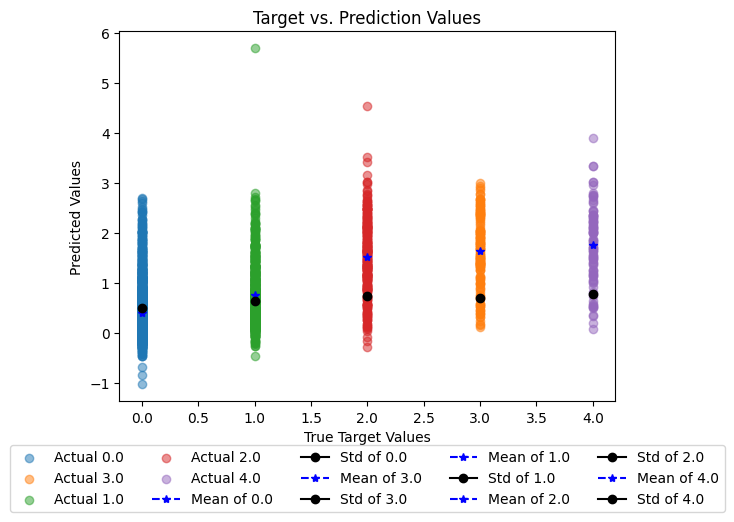

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

df = pd.read_csv('./result/predictions.csv')
print(df.columns)

# Calculate the standard deviation and mean for each class
std_mean_per_class = df.groupby('True y_test')['Predicted y_test'].agg(['std', 'mean']).reset_index()

y_test = df["True y_test"]
predictions = df["Predicted y_test"]

slope, intercept = np.polyfit(y_test, predictions, 1)
# Create scatter plots separately for each actual value
for actual_value in df["True y_test"].unique():
    data = df[df["True y_test"] == actual_value]
    plt.scatter(data['True y_test'], data['Predicted y_test'], alpha=0.5, label=f'Actual {actual_value}')
    #plt.plot(y_test, slope * y_test + intercept, c='red', linestyle='--', label='R2 Fitting Line')

# Plot std and mean for each class
for actual_value in df["True y_test"].unique():
    std = std_mean_per_class.loc[std_mean_per_class["True y_test"] == actual_value, 'std'].values[0]
    mean = std_mean_per_class.loc[std_mean_per_class["True y_test"] == actual_value, 'mean'].values[0]
    plt.plot(actual_value, mean, color='blue', marker='*', linestyle='--', label=f'Mean of {actual_value}')
    plt.plot(actual_value, std, c='black', marker='o', label=f'Std of {actual_value}')

plt.xlabel('True Target Values')
plt.ylabel('Predicted Values')
plt.title('Target vs. Prediction Values')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)

plt.show()
